In [52]:
import yfinance as yf
import pandas as pd
# List of stock tickers
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
# Download historical data
data = yf.download(tickers, start="2015-01-01", end="2023-01-01", group_by='ticker')
# Save to CSV for future use
data.to_csv('stock_data.csv')

[*********************100%***********************]  5 of 5 completed


In [53]:
# Load data from CSV
data = pd.read_csv('stock_data.csv', header=[0, 1], index_col=0, parse_dates=True)
# Handle missing values
data.ffill(inplace=True)  # Forward fill missing values
data.dropna(inplace=True)  # Drop any remaining rows with missing values
# Check for anomalies (e.g., negative prices)
print(data.describe())

Ticker        GOOGL                                                       \
Price          Open         High          Low        Close        Volume   
count   2014.000000  2014.000000  2014.000000  2014.000000  2.014000e+03   
mean      67.838070    68.537640    67.121942    67.843564  3.644426e+07   
std       33.499039    33.885493    33.082547    33.480387  1.770408e+07   
min       24.871837    24.923649    24.456841    24.763231  9.312000e+06   
25%       40.978578    41.162904    40.571425    40.877563  2.587600e+07   
50%       56.972223    57.447749    56.364673    57.038980  3.186800e+07   
75%       87.868844    88.576651    86.765598    87.796232  4.145650e+07   
max      150.703685   150.999107   148.361183   149.297302  2.571620e+08   

Ticker         TSLA                                                       ...  \
Price          Open         High          Low        Close        Volume  ...   
count   2014.000000  2014.000000  2014.000000  2014.000000  2.014000e+03  ...

In [55]:
# Ensure the index is a datetime object
data.index = pd.to_datetime(data.index)
# Sort by date
data.sort_index(inplace=True)

# EDA

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

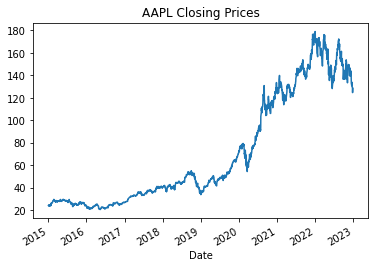

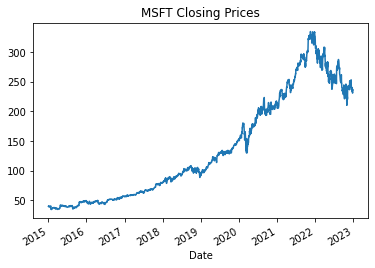

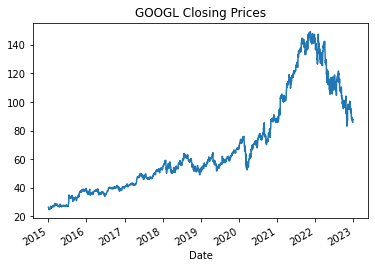

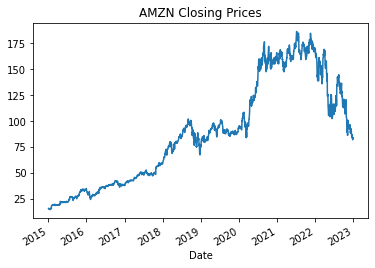

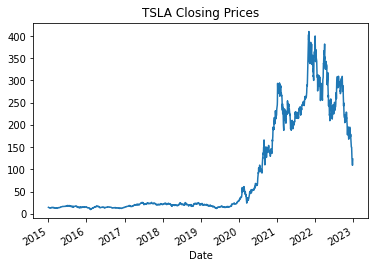

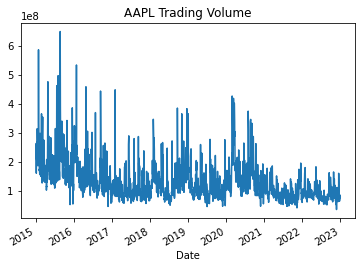

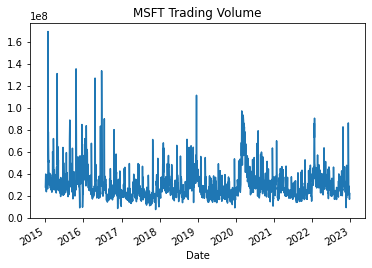

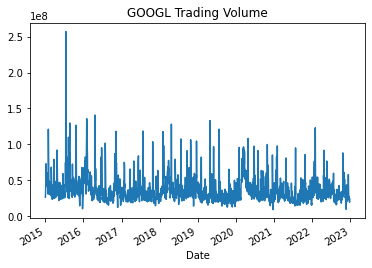

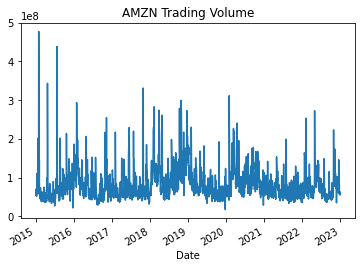

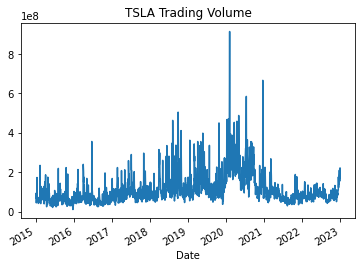

In [57]:
# Plot closing prices for each stock
for ticker in tickers:
    data[ticker]['Close'].plot(title=f'{ticker} Closing Prices')
    plt.show()

# Plot volume trends
for ticker in tickers:
    data[ticker]['Volume'].plot(title=f'{ticker} Trading Volume')
    plt.show()

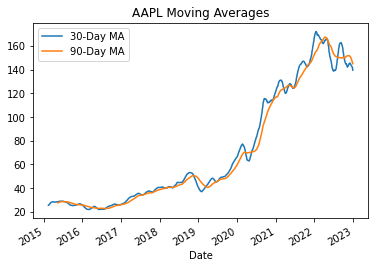

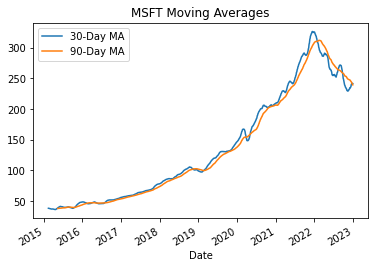

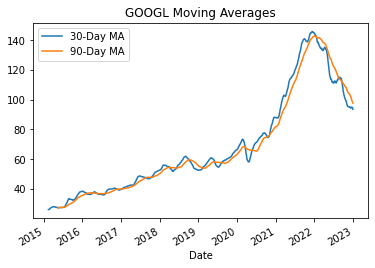

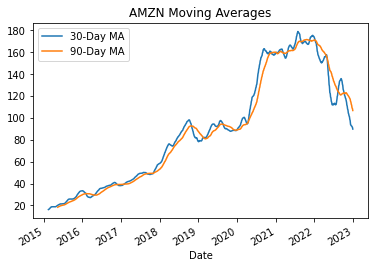

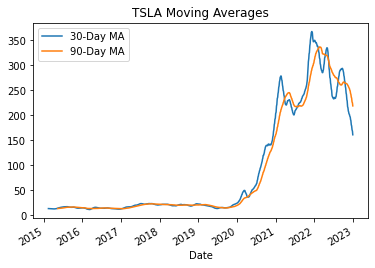

In [58]:
# Calculate and plot moving averages
for ticker in tickers:
    data[ticker]['Close'].rolling(window=30).mean().plot(label='30-Day MA')
    data[ticker]['Close'].rolling(window=90).mean().plot(label='90-Day MA')
    plt.title(f'{ticker} Moving Averages')
    plt.legend()
    plt.show()

In [59]:
for ticker in tickers:
    # Lagged variables
    data[ticker, 'Lag1'] = data[ticker]['Close'].shift(1)
    # Rolling means
    data[ticker, 'RollingMean7'] = data[ticker]['Close'].rolling(window=7).mean()
    # Percentage changes
    data[ticker, 'PctChange'] = data[ticker]['Close'].pct_change()
# Drop rows with NaN values created by feature engineering
data.dropna(inplace=True)

# Apple Stock

In [60]:
# Select a stock for ARIMA modeling
stock = 'AAPL'
close_prices = data[stock]['Close']
# Split data into train and test sets
train_size = int(len(close_prices) * 0.8)
train, test = close_prices[:train_size], close_prices[train_size:]
# Fit ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # Example parameters (p, d, q)
model_fit = model.fit()
# Forecast
forecast = model_fit.forecast(steps=len(test))
# Evaluate
rmse = mean_squared_error(test, forecast, squared=False)
print(f'RMSE for {stock}: {rmse}')

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE for AAPL: 30.37694536419091


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


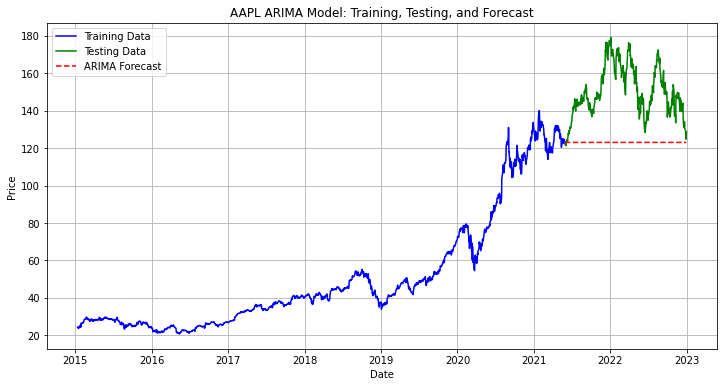

In [61]:
# ARIMA Forecast Visualization
plt.figure(figsize=(12, 6))
# Plot training data
plt.plot(train.index, train, label='Training Data', color='blue')
# Plot testing data
plt.plot(test.index, test, label='Testing Data', color='green')
# Plot ARIMA forecast
plt.plot(test.index, forecast, label='ARIMA Forecast', color='red', linestyle='--')
# Add labels and title
plt.title(f'{stock} ARIMA Model: Training, Testing, and Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# Amazon stock

In [64]:
# Select a stock for ARIMA modeling
stock = 'AMZN'
close_prices = data[stock]['Close']
# Split data into train and test sets
train_size = int(len(close_prices) * 0.8)
train, test = close_prices[:train_size], close_prices[train_size:]
# Fit ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # Example parameters (p, d, q)
model_fit = model.fit()
# Forecast
forecast = model_fit.forecast(steps=len(test))
# Evaluate
rmse = mean_squared_error(test, forecast, squared=False)
print(f'RMSE for {stock}: {rmse}')

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE for AMZN: 34.5767294889837


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


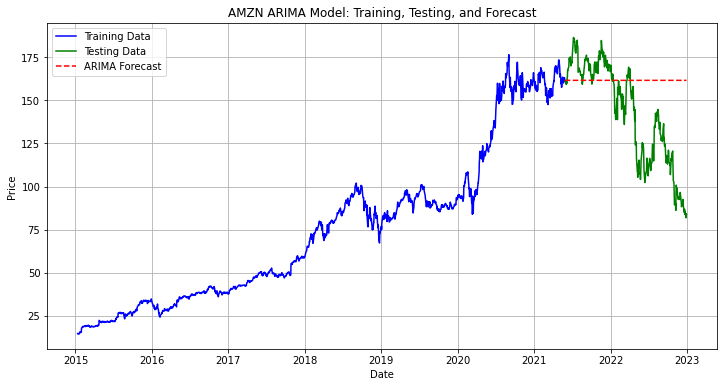

In [65]:
# ARIMA Forecast Visualization
plt.figure(figsize=(12, 6))
# Plot training data
plt.plot(train.index, train, label='Training Data', color='blue')
# Plot testing data
plt.plot(test.index, test, label='Testing Data', color='green')
# Plot ARIMA forecast
plt.plot(test.index, forecast, label='ARIMA Forecast', color='red', linestyle='--')
# Add labels and title
plt.title(f'{stock} ARIMA Model: Training, Testing, and Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# Microsoft stock

In [66]:
# Select a stock for ARIMA modeling
stock = 'MSFT'
close_prices = data[stock]['Close']
# Split data into train and test sets
train_size = int(len(close_prices) * 0.8)
train, test = close_prices[:train_size], close_prices[train_size:]
# Fit ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # Example parameters (p, d, q)
model_fit = model.fit()
# Forecast
forecast = model_fit.forecast(steps=len(test))
# Evaluate
rmse = mean_squared_error(test, forecast, squared=False)
print(f'RMSE for {stock}: {rmse}')

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE for MSFT: 42.672718217740574


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


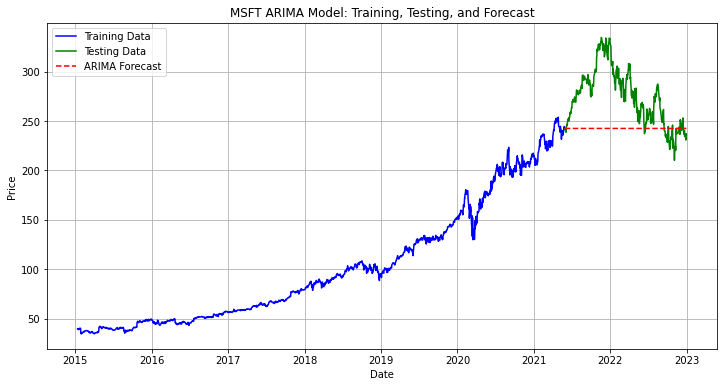

In [46]:
# ARIMA Forecast Visualization
plt.figure(figsize=(12, 6))
# Plot training data
plt.plot(train.index, train, label='Training Data', color='blue')
# Plot testing data
plt.plot(test.index, test, label='Testing Data', color='green')
# Plot ARIMA forecast
plt.plot(test.index, forecast, label='ARIMA Forecast', color='red', linestyle='--')
# Add labels and title
plt.title(f'{stock} ARIMA Model: Training, Testing, and Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# Google stock

In [67]:
# Select a stock for ARIMA modeling
stock = 'GOOGL'
close_prices = data[stock]['Close']
# Split data into train and test sets
train_size = int(len(close_prices) * 0.8)
train, test = close_prices[:train_size], close_prices[train_size:]
# Fit ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # Example parameters (p, d, q)
model_fit = model.fit()
# Forecast
forecast = model_fit.forecast(steps=len(test))
# Evaluate
rmse = mean_squared_error(test, forecast, squared=False)
print(f'RMSE for {stock}: {rmse}')

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE for GOOGL: 18.258238836812286


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


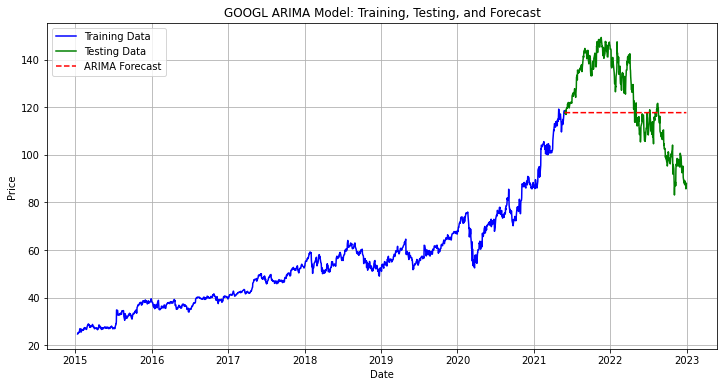

In [68]:
# ARIMA Forecast Visualization
plt.figure(figsize=(12, 6))
# Plot training data
plt.plot(train.index, train, label='Training Data', color='blue')
# Plot testing data
plt.plot(test.index, test, label='Testing Data', color='green')
# Plot ARIMA forecast
plt.plot(test.index, forecast, label='ARIMA Forecast', color='red', linestyle='--')
# Add labels and title
plt.title(f'{stock} ARIMA Model: Training, Testing, and Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# Tesla stock

In [69]:
# Select a stock for ARIMA modeling
stock = 'TSLA'
close_prices = data[stock]['Close']
# Split data into train and test sets
train_size = int(len(close_prices) * 0.8)
train, test = close_prices[:train_size], close_prices[train_size:]
# Fit ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # Example parameters (p, d, q)
model_fit = model.fit()
# Forecast
forecast = model_fit.forecast(steps=len(test))
# Evaluate
rmse = mean_squared_error(test, forecast, squared=False)
print(f'RMSE for {stock}: {rmse}')

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE for TSLA: 82.39913974333467


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


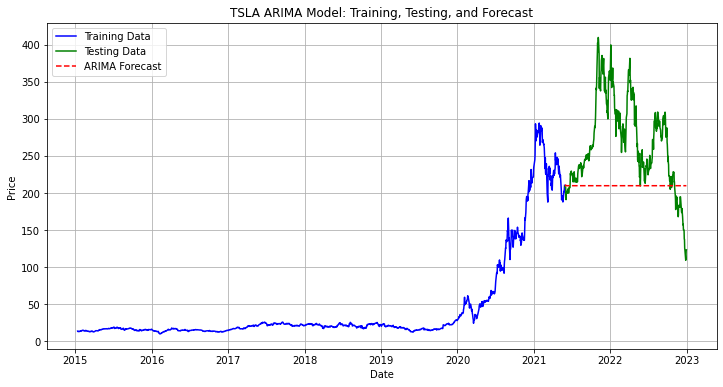

In [70]:
# ARIMA Forecast Visualization
plt.figure(figsize=(12, 6))
# Plot training data
plt.plot(train.index, train, label='Training Data', color='blue')
# Plot testing data
plt.plot(test.index, test, label='Testing Data', color='green')
# Plot ARIMA forecast
plt.plot(test.index, forecast, label='ARIMA Forecast', color='red', linestyle='--')
# Add labels and title
plt.title(f'{stock} ARIMA Model: Training, Testing, and Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [71]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# Prepare features and target
features = ['Lag1', 'RollingMean7', 'PctChange']
X = data[stock][features]
y = data[stock]['Close']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gb_model.fit(X_train, y_train)

# Predict
y_pred = gb_model.predict(X_test)

# Evaluate
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE for Gradient Boosting: {rmse}')

RMSE for Gradient Boosting: 2.191115294281609


In [72]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# ARIMA evaluation
arima_mae = mean_absolute_error(test, forecast)
arima_mape = mean_absolute_percentage_error(test, forecast)

# Gradient Boosting evaluation
gb_mae = mean_absolute_error(y_test, y_pred)
gb_mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'ARIMA MAE: {arima_mae}, MAPE: {arima_mape}')
print(f'Gradient Boosting MAE: {gb_mae}, MAPE: {gb_mape}')

ARIMA MAE: 65.9201218334314, MAPE: 0.22823513888643743
Gradient Boosting MAE: 1.1216700665930472, MAPE: 0.013075208132681362


In [74]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Example data (replace with your actual data)
# Assuming 'data' is a pandas DataFrame with a DateTime index and 'Close' column
data = pd.read_csv('stock_data.csv', index_col='Date', parse_dates=True)
stock = 'AAPL'  # Replace with your stock ticker
close_prices = data[stock]['Close']

# Split data into training and testing sets
train_size = int(len(close_prices) * 0.8)
train, test = close_prices[:train_size], close_prices[train_size:]

# Fit ARIMA model (replace p, d, q with your optimal parameters)
model = ARIMA(train, order=(5, 1, 0))  # Example: ARIMA(5, 1, 0)
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Plotting
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(train.index, train, label='Training Data', color='blue')

# Plot testing data
plt.plot(test.index, test, label='Testing Data', color='green')

# Plot ARIMA forecast
plt.plot(test.index, forecast, label='ARIMA Forecast', color='red', linestyle='--')

# Add labels and title
plt.title(f'{stock} ARIMA Model: Training, Testing, and Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()

# Save the plot as a PNG file
plt.savefig('arima_forecast.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

ValueError: 'Date' is not in list